Homework7 Name: Jingyue Zhang Student ID:7529916982 Github username：jingyuezzz

In [143]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


1.(a)

In [176]:
data = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
train_data,test_data = train_test_split(data, test_size=0.3, random_state=1)
data_x = data.iloc[:, :-4]
data_y = data.iloc[:, -4:-1]
data_y1 = data_y['Family']
data_y2 = data_y['Genus']
data_y3 = data_y['Species']

1.(b)i

Exact match is the percentage of samples that all classes are matched with the label.

The Hamming loss is the fraction of labels that are incorrectly predicted.

1.(b)ii

In [110]:
train_x = train_data.iloc[:, :-4]
train_y = train_data.iloc[:, -4:-1]
test_x = test_data.iloc[:, :-4]
test_y = test_data.iloc[:, -4:-1]

In [111]:
train_y1 = train_y['Family']
train_y2 = train_y['Genus']
train_y3 = train_y['Species']
test_y1 = test_y['Family']
test_y2 = test_y['Genus']
test_y3 = test_y['Species']

In [112]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
c_range = [10**c for c in np.arange(-4, 4, dtype=float)]
g_range = np.arange(0.1, 2.1, 0.1)


In [41]:
def find_threshold(trainx,trainy):
    c_list = []
    for c in c_range:
        svclassifier = SVC(C = c,kernel='rbf',decision_function_shape='ovr')
        svclassifier.fit(trainx, trainy)
        score = svclassifier.score(trainx, trainy)
        if score>=0.95:
            c_list.append((c, score))
            g_list=[]
    for g in g_range:
        svclassifier = SVC(gamma= g,kernel='rbf',decision_function_shape='ovr')
        svclassifier.fit(trainx, trainy)
        score = svclassifier.score(trainx, trainy)
        if score>=0.95:
            g_list.append((g, score))
    print(c_list)
    print(g_list)
    

In [49]:
#class1
find_threshold(train_x,train_y1)

[(0.1, 0.9525416997617157), (1.0, 0.9823272438443209), (10.0, 0.9954328832406671), (100.0, 1.0), (1000.0, 1.0)]
[(0.2, 0.9630659253375695), (0.30000000000000004, 0.9682287529785544), (0.4, 0.971405877680699), (0.5, 0.9779586973788721), (0.6, 0.982724384432089), (0.7000000000000001, 0.9861000794281175), (0.8, 0.9876886417791898), (0.9, 0.9894757744241461), (1.0, 0.9892772041302621), (1.1, 0.9900714853057982), (1.2000000000000002, 0.9908657664813344), (1.3000000000000003, 0.9910643367752184), (1.4000000000000001, 0.9914614773629865), (1.5000000000000002, 0.9920571882446386), (1.6, 0.9928514694201748), (1.7000000000000002, 0.9930500397140588), (1.8000000000000003, 0.9930500397140588), (1.9000000000000001, 0.9936457505957109), (2.0, 0.994241461477363)]


According to the result above, for class 1 the range of c is (10^-1,10^2),the range of gamma is (0.2,2.0)with threshold of 0.95.

In [43]:
c1_range = [10**c for c in np.arange(-1, 2, dtype=float)]
g1_range = np.arange(0.2, 2.1, 0.1)
model = SVC(kernel='rbf',decision_function_shape='ovr')
parameters = {'C':c1_range, 'gamma':g1_range}
clf1 = GridSearchCV(model, parameters, cv=10).fit(train_x, train_y1)

In [53]:
c1 = clf1.best_params_['C']
gamma1 = clf1.best_params_['gamma']
print("best c for class1:",c1)
print("best gamma for class1:",gamma1)

best c for class1: 10.0
best gamma for class1: 1.9000000000000006


In [35]:
#class2
find_threshold(train_x,train_y2)

[(1.0, 0.982724384432089), (10.0, 0.9968228752978554), (100.0, 1.0), (1000.0, 1.0)]
[(0.2, 0.954328832406672), (0.30000000000000004, 0.9700158856235107), (0.4, 0.9763701350277998), (0.5, 0.9791501191421763), (0.6, 0.9835186656076251), (0.7000000000000001, 0.9857029388403494), (0.8, 0.9872915011914217), (0.9, 0.988482922954726), (1.0, 0.9894757744241461), (1.1, 0.9900714853057982), (1.2000000000000002, 0.9908657664813344), (1.3000000000000003, 0.9912629070691025), (1.4000000000000001, 0.9914614773629865), (1.5000000000000002, 0.9920571882446386), (1.6, 0.9924543288324067), (1.7000000000000002, 0.9928514694201748), (1.8000000000000003, 0.9932486100079428), (1.9000000000000001, 0.994042891183479), (2.0, 0.994241461477363)]


According to the result above, for class 2 the range of c is (10^0,10^2),the range of gamma is (0.2,2.0)with threshold of 0.95.

In [54]:
c2_range = [10**c for c in np.arange(0, 2, dtype=float)]
g2_range = np.arange(0.2, 2.1, 0.1)
model = SVC(kernel='rbf',decision_function_shape='ovr')
parameters = {'C':c2_range, 'gamma':g2_range}
clf2 = GridSearchCV(model, parameters, cv=10).fit(train_x, train_y2)
c2 = clf2.best_params_['C']
gamma2 = clf2.best_params_['gamma']
print("best c for class2:",c2)
print("best gamma for class2:",gamma2)

best c for class2: 10.0
best gamma for class2: 2.000000000000001


In [36]:
#class3
find_threshold(train_x,train_y3)

[(1.0, 0.9859015091342335), (10.0, 0.9976171564733916), (100.0, 1.0), (1000.0, 1.0)]
[(0.2, 0.9696187450357426), (0.30000000000000004, 0.9733915806195393), (0.4, 0.9785544082605242), (0.5, 0.9819301032565528), (0.6, 0.9859015091342335), (0.7000000000000001, 0.9872915011914217), (0.8, 0.98868149324861), (0.9, 0.9896743447180302), (1.0, 0.9900714853057982), (1.1, 0.9904686258935663), (1.2000000000000002, 0.9914614773629865), (1.3000000000000003, 0.9920571882446386), (1.4000000000000001, 0.9926528991262907), (1.5000000000000002, 0.9930500397140588), (1.6, 0.9932486100079428), (1.7000000000000002, 0.993844320889595), (1.8000000000000003, 0.994042891183479), (1.9000000000000001, 0.9944400317712471), (2.0, 0.9946386020651311)]


According to the result above, for class 2 the range of c is (10^0,10^2),the range of gamma is (0.2,2.0)with threshold of 0.95.

In [55]:
c3_range = [10**c for c in np.arange(0, 2, dtype=float)]
g3_range = np.arange(0.2, 2.1, 0.1)
model = SVC(kernel='rbf',decision_function_shape='ovr')
parameters = {'C':c3_range, 'gamma':g3_range}
clf3 = GridSearchCV(model, parameters, cv=10).fit(train_x, train_y3)
c3 = clf3.best_params_['C']
gamma3 = clf3.best_params_['gamma']
print("best c for class3:",c3)
print("best gamma for class:",gamma3)

best c for class3: 10.0
best gamma for class: 1.8000000000000005


In [113]:
#fit the model with best parameters
svc_1 = SVC(C=c1, gamma=gamma1,kernel='rbf', random_state=1).fit(train_x, train_y1)
svc_2 = SVC(C=c2, gamma=gamma2,kernel='rbf', random_state=1).fit(train_x, train_y2)
svc_3 = SVC(C=c3, gamma=gamma3,kernel='rbf', random_state=1).fit(train_x, train_y3)

#predict
predict_y1 = pd.DataFrame(svc_1.predict(test_x))
predict_y2 = pd.DataFrame(svc_2.predict(test_x))
predict_y3 = pd.DataFrame(svc_3.predict(test_x))
predict_result = pd.concat([predict_y1,predict_y2,predict_y3], axis=1, ignore_index=True)

In [121]:
from sklearn.metrics import hamming_loss, silhouette_score
testy_t = test_y.reset_index(drop=True)
testy_t.columns = range(testy_t.shape[1])
unmatch = testy_t.compare(predict_result)
exact_matched = (len(testy_t)-len(unmatch))/len(testy_t)
hamm1 = hamming_loss(test_y1, predict_y1)
hamm2 = hamming_loss(test_y2, predict_y2)
hamm3 = hamming_loss(test_y3, predict_y3)
avghamm = (hamm1+hamm2+hamm3)/3
print("exact match:",exact_matched)
print("hamming score:",1-avghamm)

exact match: 0.984251968503937
hamming score: 0.9888837424733673


1.(b)iii


In [130]:
from sklearn.svm import LinearSVC
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
train_x_T = scaler.fit_transform(train_x)
test_x_T = scaler.fit_transform(test_x)
parameters = {'C':c_range}
svc_L1 = LinearSVC(penalty='l1', dual=False, max_iter=5000)
cv1 = GridSearchCV(svc_L1, parameters, cv=10).fit(train_x_T, train_y1)
cv2 = GridSearchCV(svc_L1, parameters, cv=10).fit(train_x_T, train_y2)
cv3 = GridSearchCV(svc_L1, parameters, cv=10).fit(train_x_T, train_y3)

In [165]:
c1 = cv1.best_params_['C']
c2 = cv2.best_params_['C']
c3 = cv3.best_params_['C']
l1svc1 = LinearSVC(penalty='l1', C=c1, dual=False,max_iter=5000).fit(train_x_T, train_y1)
l1svc2 = LinearSVC(penalty='l1', C=c2, dual=False,max_iter=5000).fit(train_x_T, train_y2)
l1svc3 = LinearSVC(penalty='l1', C=c3, dual=False,max_iter=5000).fit(train_x_T, train_y3)
print("best c1:",c1)
print("best c2:",c2)
print("best c3:",c3)

best c1: 1.0
best c2: 100.0
best c3: 1.0


In [138]:
predict_y1_l1 = pd.DataFrame(l1svc1.predict(test_x_T))
predict_y2_l1 = pd.DataFrame(l1svc2.predict(test_x_T))
predict_y3_l1 = pd.DataFrame(l1svc3.predict(test_x_T))
predict_result_l1 = pd.concat([predict_y1_l1,predict_y2_l1,predict_y3_l1], axis=1, ignore_index=True)

In [136]:
unmatch_l1 = testy_t.compare(predict_result_l1)
exact_matched_l1 = (len(testy_t)-len(unmatch_l1))/len(testy_t)
hamm1 = hamming_loss(test_y1, predict_y1_l1)
hamm2 = hamming_loss(test_y2, predict_y2_l1)
hamm3 = hamming_loss(test_y3, predict_y3_l1)
avghamm_l1 = (hamm1+hamm2+hamm3)/3
print("exact match:",exact_matched_l1)
print("hamming score:",1-avghamm_l1)

exact match: 0.9124594719777674
hamming score: 0.9444187123668365


1.(b)iv.

In [163]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [166]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LinearSVC(penalty='l1', dual=False, max_iter=5000)]])
parameters= {'classifier__C':c_range}
grid_search1= GridSearchCV(estimator=pipeline,param_grid=parameters,cv=10,
                           n_jobs=-1).fit(train_x_T, train_y1)
grid_search2= GridSearchCV(estimator=pipeline,param_grid=parameters,cv=10,
                           n_jobs=-1).fit(train_x_T, train_y2)
grid_search3= GridSearchCV(estimator=pipeline,param_grid=parameters,cv=10,
                           n_jobs=-1).fit(train_x_T, train_y3)

cv_score1 = grid_search1.best_score_
cv_score2 = grid_search2.best_score_
cv_score3 = grid_search3.best_score_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [167]:
l1svc1_s = LinearSVC(penalty='l1', C=cv_score1, dual=False,max_iter=5000).fit(train_x_T, train_y1)
l1svc2_s = LinearSVC(penalty='l1', C=cv_score2, dual=False,max_iter=5000).fit(train_x_T, train_y2)
l1svc3_s = LinearSVC(penalty='l1', C=cv_score3, dual=False,max_iter=5000).fit(train_x_T, train_y3)
print("best c1:",c1)
print("best c2:",c2)
print("best c3:",c3)

best c1: 1.0
best c2: 100.0
best c3: 1.0


In [168]:
predict_y1_sm = pd.DataFrame(l1svc1_s.predict(test_x_T))
predict_y2_sm = pd.DataFrame(l1svc2_s.predict(test_x_T))
predict_y3_sm = pd.DataFrame(l1svc3_s.predict(test_x_T))
predict_result_sm = pd.concat([predict_y1_sm,predict_y2_sm,predict_y3_sm], axis=1, ignore_index=True)
unmatch_sm = testy_t.compare(predict_result_sm)
exact_matched_sm = (len(testy_t)-len(unmatch_sm))/len(testy_t)
hamm1 = hamming_loss(test_y1, predict_y1_sm)
hamm2 = hamming_loss(test_y2, predict_y2_sm)
hamm3 = hamming_loss(test_y3, predict_y3_sm)
avghamm_sm = (hamm1+hamm2+hamm3)/3
print("exact match:",exact_matched_sm)
print("hamming score:",1-avghamm_sm)

exact match: 0.9133858267716536
hamming score: 0.9447274972981319


2(a)(b)(c)

In [192]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
optimal_k = 1
best_score = 0
distances = list()
scores = list()
loss = list()
for j in tqdm(range(50)):
    for k in range(2, 50):
        kmeansModel = KMeans(n_clusters=k,init = 'random').fit(data_x)
        labels = kmeansModel.labels_
        score = silhouette_score(data_x, labels)
        if score > best_score:
            optimal_k = k
            best_score = score
    #part a answer
    #print("The optimal K:",optimal_k)
    #print("Silhouettes score:",best_score)
    kmeans_optimal = KMeans(n_clusters = optimal_k).fit(data_x)
    predict_label = kmeans_optimal.labels_
    predict = pd.DataFrame(predict_label, columns = ["Cluster"])
    cluster_index = {}
    for i in range(optimal_k):
            cluster_index[i] = predict[predict["Cluster"]==i].index
    majority = {} 
    for i in range(optimal_k):
            majority_1 = data_y1.iloc[cluster_index[i]].value_counts().index[0]
            majority_2 = data_y2.iloc[cluster_index[i]].value_counts().index[0]
            majority_3 = data_y3.iloc[cluster_index[i]].value_counts().index[0]
            majority[i] = (majority_1, majority_2, majority_3)
    
    predict_1 = [majority[x][0] for x in predict["Cluster"]]
    predict_2 = [majority[x][1] for x in predict["Cluster"]]
    predict_3 = [majority[x][2] for x in predict["Cluster"]]
    hamming_loss_f = hamming_loss(data_y1, predict_1)
    hamming_loss_g = hamming_loss(data_y2, predict_2)
    hamming_loss_s = hamming_loss(data_y3, predict_3)
    hamming_loss_value = np.mean([hamming_loss_f, hamming_loss_g, hamming_loss_s])
    hamming_score = 1-hamming_loss_value
    hamming_distance = hamming_loss_value * len(data_y1)*3
    distances.append(hamming_distance)
    scores.append(hamming_score)
    loss.append(hamming_loss_value)
    

100%|███████████████████████████████████████████| 50/50 [42:22<00:00, 50.85s/it]


In [196]:
import statistics as stat
print("average the 50 Hamming Distances:",stat.mean(distances))
print("standard deviation of the 50 Hamming Distances:",stat.stdev(distances))
print("average the 50 Hamming score:",stat.mean(scores))
print("standard deviation of the 50 Hamming score:",stat.stdev(scores))

average the 50 Hamming Distances: 4844.38
standard deviation of the 50 Hamming Distances: 197.40829852498752
average the 50 Hamming score: 0.7755672921009961
standard deviation of the 50 Hamming score: 0.009145624207782602


3.

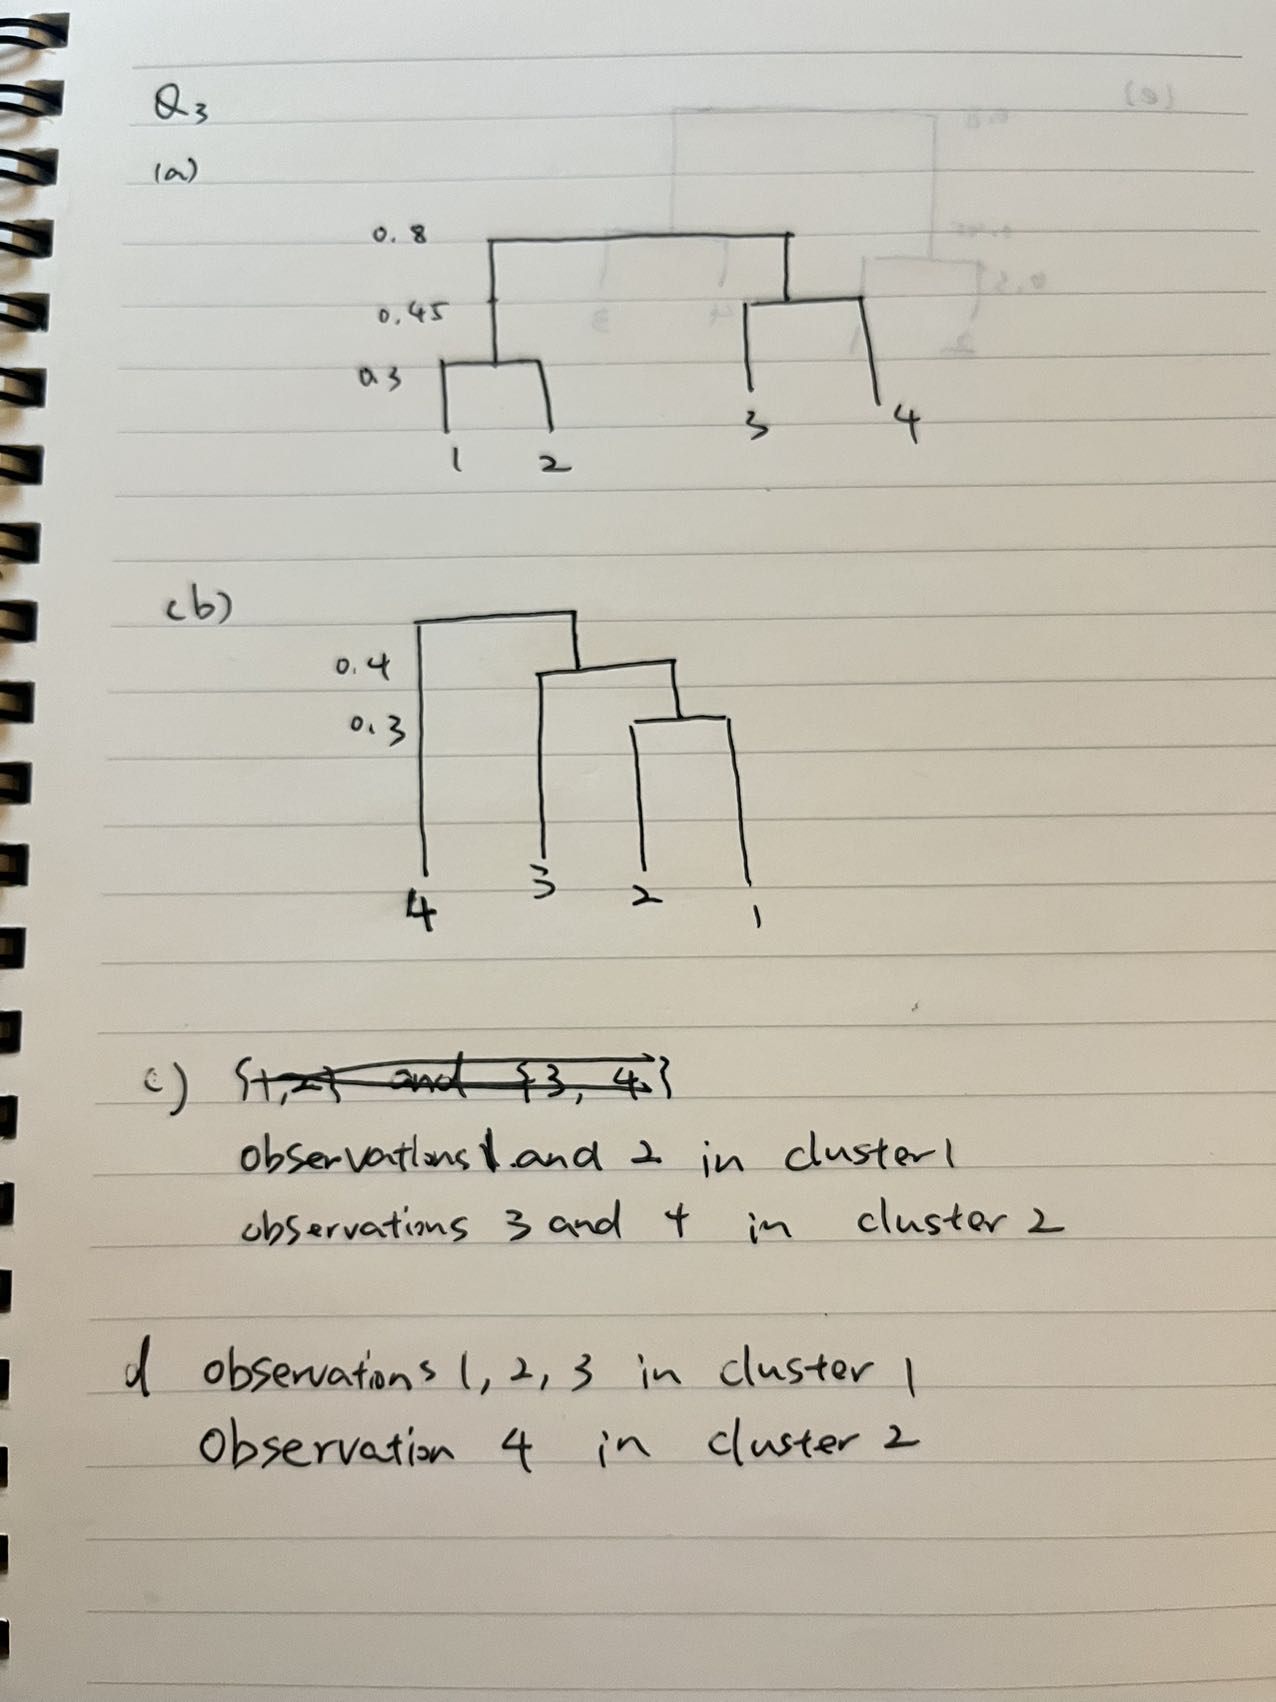

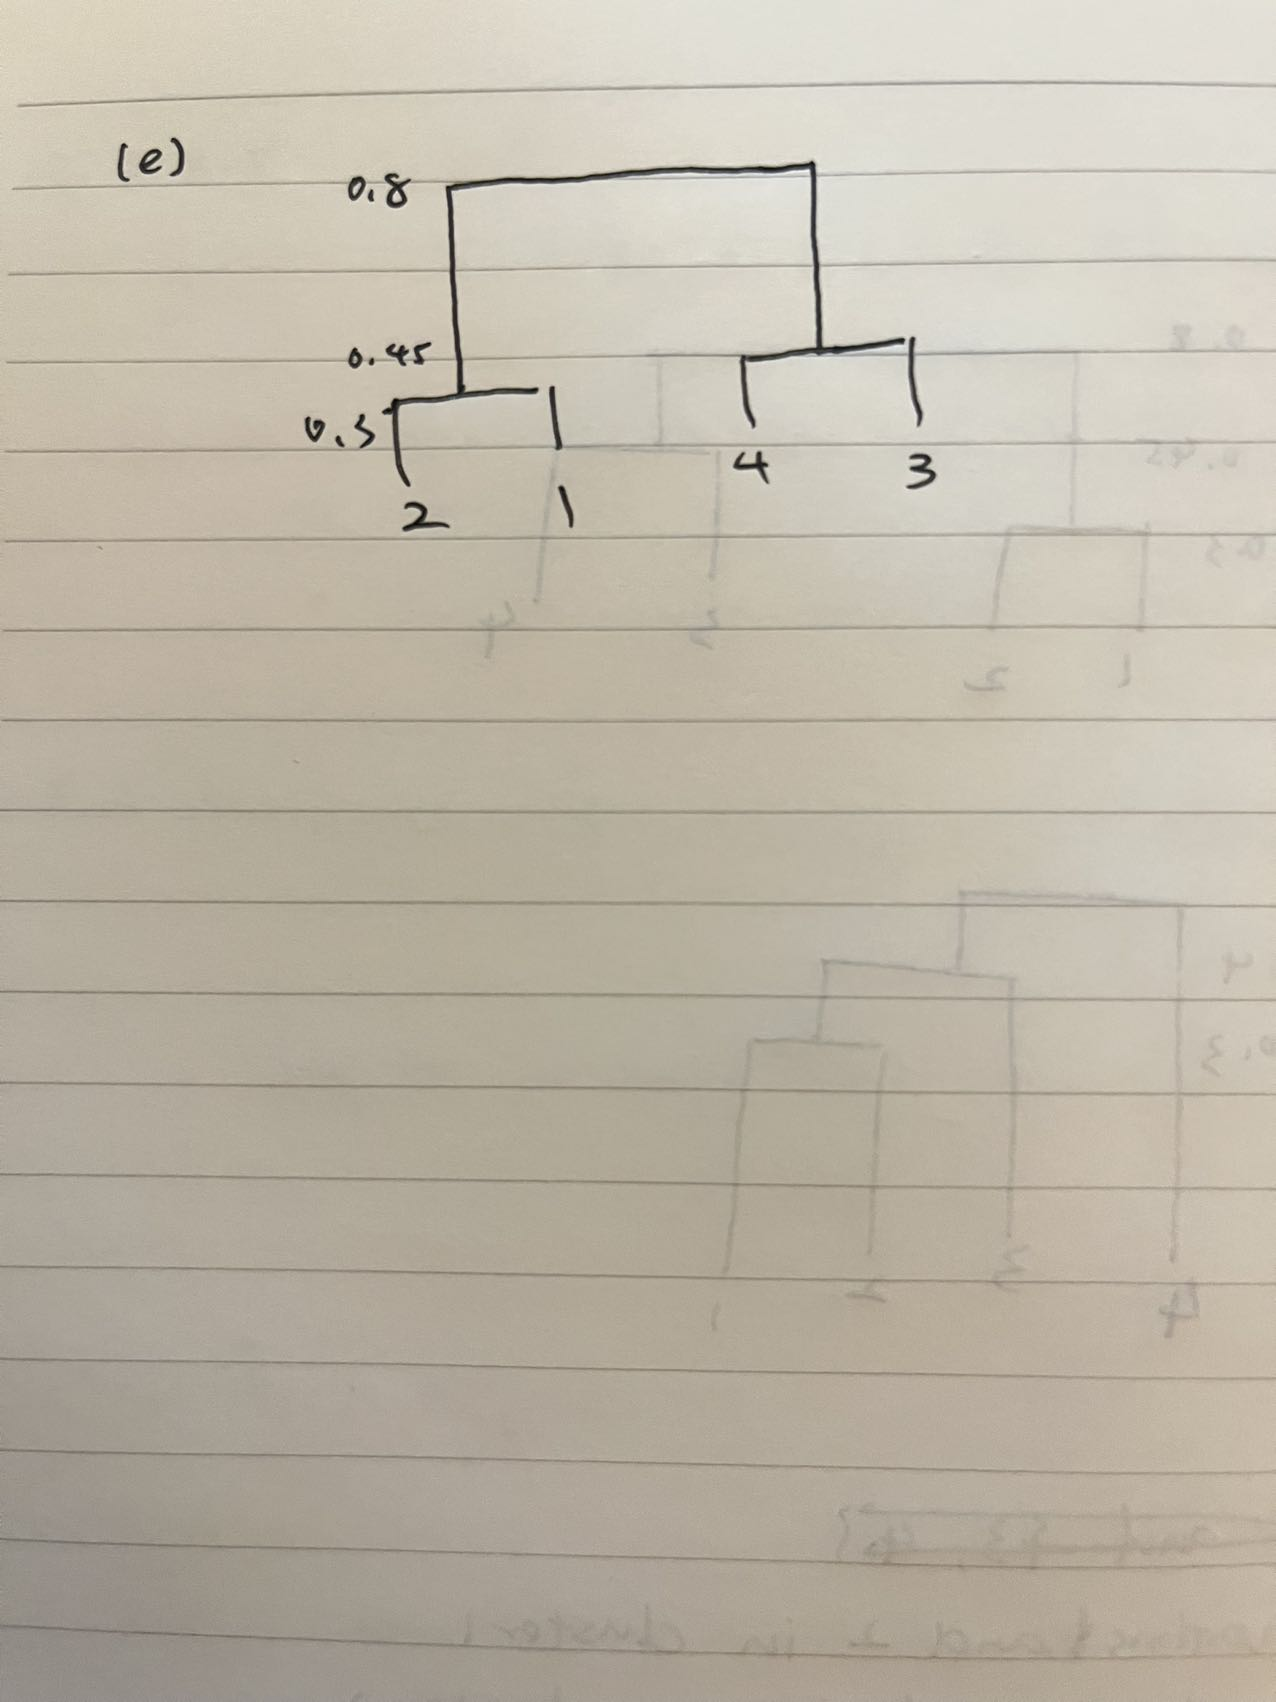